In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


Original Dataset:
         name  persistence_days   toxicity  bioaccumulation  biodegradation  \
0  Chemical A       1367.696894   2.058449       611.852895       60.754485   
1  Chemical B       3470.156504  96.990985       139.493861       17.052412   
2  Chemical C       2672.045894  83.244264       292.144649        6.505159   
3  Chemical D       2185.504809  21.233911       366.361843       94.888554   
4  Chemical E        570.312019  18.182497       456.069984       96.563203   
5  Chemical F        570.224005  18.340451       785.175961       80.839735   
6  Chemical G        212.947101  30.424224       199.673782       30.461377   
7  Chemical H       3161.676756  52.475643       514.234438        9.767211   
8  Chemical I       2194.468678  43.194502       592.414569       68.423303   
9  Chemical J       2584.756836  29.122914        46.450413       44.015249   

   environmental_effects  
0               1.220382  
1               4.951769  
2               0.343885  
3  

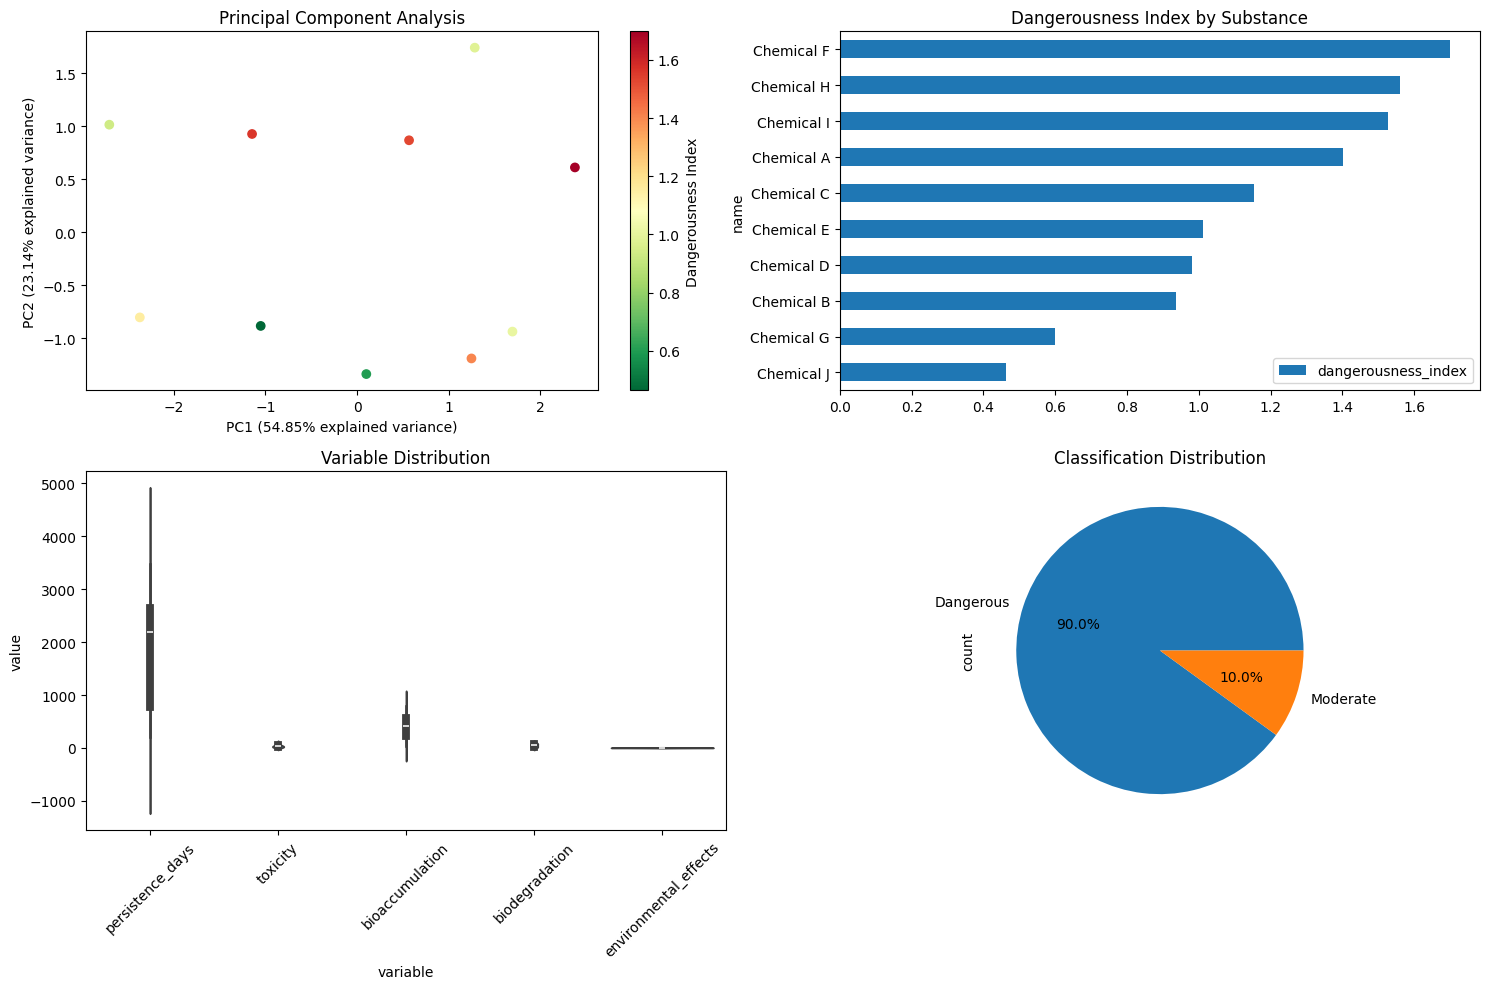

,name,persistence_days,toxicity,bioaccumulation,biodegradation,environmental_effects,dangerousness_index,classification
0,Chemical A,1367.696894,2.058449,611.852895,60.754485,1.220382,1.401354,Dangerous
1,Chemical B,3470.156504,96.990985,139.493861,17.052412,4.951769,0.936057,Dangerous
2,Chemical C,2672.045894,83.244264,292.144649,6.505159,0.343885,1.152606,Dangerous
3,Chemical D,2185.504809,21.233911,366.361843,94.888554,9.093204,0.982199,Dangerous
4,Chemical E,570.312019,18.182497,456.069984,96.563203,2.587800,1.012214,Dangerous
5,Chemical F,570.224005,18.340451,785.175961,80.839735,6.625223,1.698436,Dangerous
6,Chemical G,212.947101,30.424224,199.673782,30.461377,3.117111,0.600336,Dangerous
7,Chemical H,3161.676756,52.475643,514.234438,9.767211,5.200680,1.560072,Dangerous
8,Chemical I,2194.468678,43.194502,592.414569,68.423303,5.467103,1.526015,Dangerous
9,Chemical J,2584.756836,29.122914,46.450413,44.015249,1.848545,0.463980,Moderate


In [17]:
def create_sintethetic_chemical_dataset():
    np.random.seed(42)

    # Create data for 10 chemical substances
    substances = {
        'name': ['Chemical A', 'Chemical B', 'Chemical C', 'Chemical D', 'Chemical E', 'Chemical F', 'Chemical G', 'Chemical H', 'Chemical I', 'Chemical J'],
        'persistence_days': np.random.uniform(1, 3650, 10),  # 1 day to 10 years
        'toxicity': np.random.uniform(0, 100, 10),
        'bioaccumulation': np.random.uniform(0, 1000, 10),
        'biodegradation': np.random.uniform(0, 100, 10),  # Scale 0-100
        'environmental_effects': np.random.uniform(0, 10, 10), # Scale 0-100
    }

    return pd.DataFrame(substances)

def calculate_dangerousness(row):
    return (
        (row['persistence_days'] / 3650) * 0.3 + # 30% weight
        (row['toxicity'] / 100) * 0.25 + # 25% weight
        (row['bioaccumulation'] / 100) * 0.2 + # 20% weight
        ((100 - row['biodegradation']) / 100) * 0.15 + # 15% weight
        (row['environmental_effects'] / 100) * 0.1
    )

def classify_substance(index):
    if index < 0.3:
        return 'Safe'
    elif index < 0.6:
        return 'Moderate'
    else:
        return 'Dangerous'

def substance_analysis(df):
    # Calculate dangerousness 
    df['dangerousness_index'] = df.apply(calculate_dangerousness, axis=1)
    df['classification'] = df['dangerousness_index'].apply(classify_substance)

    # Stadistical analysis 
    statistics = df.describe()

    scaler = StandardScaler()
    features = ['persistence_days', 'toxicity', 'bioaccumulation', 'biodegradation','environmental_effects']
    X_scaled = scaler.fit_transform(df[features])

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    return df, statistics, X_pca, pca.explained_variance_ratio_



def visualize_results(df, X_pca, var_ratio):

    # I. Dispersion plot
    fig = plt.figure(figsize=(15,10))

    ax1 = plt.subplot(221)
    scatter = ax1.scatter(X_pca[:,0], X_pca[:,1],
                          c=df['dangerousness_index'], cmap='RdYlGn_r')
    ax1.set_title('Principal Component Analysis')
    ax1.set_xlabel(f'PC1 ({var_ratio[0]:.2%} explained variance)')
    ax1.set_ylabel(f'PC2 ({var_ratio[1]:.2%} explained variance)')
    plt.colorbar(scatter, label='Dangerousness Index')

    # II. Bar Plot (dangerousneess)
    ax2 = plt.subplot(222)
    df.sort_values('dangerousness_index', ascending=True).plot(
        kind='barh', x='name', y='dangerousness_index', ax=ax2)
    ax2.set_title('Dangerousness Index by Substance')

    # III. Violin Plot
    ax3 = plt.subplot(223)
    df_melt = df[['persistence_days', 'toxicity', 'bioaccumulation', 
                  'biodegradation', 'environmental_effects']].melt()
    sns.violinplot(data=df_melt, x='variable', y='value', ax=ax3)
    ax3.set_title('Variable Distribution')
    plt.xticks(rotation=45)


    # IV. Pie Chart for classification
    ax4 = plt.subplot(224)
    df['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax4)
    ax4.set_title('Classification Distribution')

    plt.tight_layout()
    plt.show()

def full_analysis():
    df = create_sintethetic_chemical_dataset()
    print("\nOriginal Dataset:")
    print(df)

    df_analized, stadistics, X_pca, var_ratio = substance_analysis(df)

    print("\nDescriptive Statistics:")
    print(df_analized[['name', 'dangerousness_index', 'classification']]
          .sort_values('dangerousness_index'))
    
    visualize_results(df_analized, X_pca, var_ratio)

    return df_analized

full_analysis()